# MLABvo - Get snapshots

This notebook shows how to get snapshots by station and date

In [1]:
from RTbolidozor import RTbolidozor as RT
import json
import datetime

# Get active stations
Every station has rating in RTbolidozor. This number shud reflect quality of measured data. ```getStation``` function wihout any aditional parameters return only active stations (with rating bellow 10). 

In [2]:
c = RT()
stations = c.getStations()
print("Count of active stations:", len(stations),'\n\n')
print(json.dumps(stations, sort_keys=True, indent=4))

Count of active stations: 8 


[
    {
        "comment": "aktualizov\u00e1no 2017/06",
        "hardware": "RMDS02E",
        "id": 23,
        "name": "ZVPP-R6",
        "namesimple": "ZVPP-R6",
        "observatory": 2,
        "observatory_url": "http://api.vo.astro.cz/bolidozor/getObservatory/?id=2",
        "owner": 1,
        "owner_url": "http://api.vo.astro.cz/bolidozor/getUser/?id=2",
        "status": 1,
        "web": "1"
    },
    {
        "comment": "aktualizov\u00e1no 2017/07 - v pr\u016fb\u011bhu Expa'17",
        "hardware": "New station",
        "id": 25,
        "name": "Hv\u011bzd\u00e1rna \u00dapice",
        "namesimple": "OBSUPICE-R6",
        "observatory": 10,
        "observatory_url": "http://api.vo.astro.cz/bolidozor/getObservatory/?id=10",
        "owner": 0,
        "owner_url": "http://api.vo.astro.cz/bolidozor/getUser/?id=10",
        "status": 1,
        "web": "0"
    },
    {
        "comment": "2017-08-15 11:27:51",
        "hardware": "New statio

# Get station by name or id

In [3]:
c = RT()
stations = c.getStations(id=1)
print(json.dumps(stations, sort_keys=True, indent=4))

[
    {
        "comment": null,
        "hardware": "RMDS02D",
        "id": 1,
        "name": "Sv\u00e1kov",
        "namesimple": "SVAKOV-R8",
        "observatory": 1,
        "observatory_url": "http://api.vo.astro.cz/bolidozor/getObservatory/?id=1",
        "owner": 2,
        "owner_url": "http://api.vo.astro.cz/bolidozor/getUser/?id=1",
        "status": 100,
        "web": "1"
    }
]


In [4]:
c = RT()
stations = c.getStations(name='SVAKOV-R8')
print(json.dumps(stations, sort_keys=True, indent=4))

[
    {
        "comment": null,
        "hardware": "RMDS02D",
        "id": 1,
        "name": "Sv\u00e1kov",
        "namesimple": "SVAKOV-R8",
        "observatory": 1,
        "observatory_url": "http://api.vo.astro.cz/bolidozor/getObservatory/?id=1",
        "owner": 2,
        "owner_url": "http://api.vo.astro.cz/bolidozor/getUser/?id=1",
        "status": 100,
        "web": "1"
    }
]


# Get all stations

In [5]:
c = RT()
stations = c.getStations(all=True)
print("Count of all stations is", len(stations))
#print(json.dumps(stations, sort_keys=True, indent=4))

Count of all stations is 24


# Set one station as default


In [10]:
c = RT()
station = c.getStations(name='SVAKOV-R12')
c.setStation(station)

print('Station id:', c.station_id)
print('Station name:', c.station_name)

snapshots = c.getSnapshot(date_from=datetime.datetime(2017,9,7 ,17,30,0), date_to=datetime.datetime(2017,9,7 ,17,50,0))
print("Count of recieved snapshots", len(snapshots))

Station id: 29
Station name: SVAKOV-R12
29
Count of recieved snapshots 19


In [11]:
import matplotlib.pyplot as plt
#from astropy.visualization import astropy_mpl_style
from astropy.utils.data import download_file
from astropy.io import fits
#plt.style.use(astropy_mpl_style)

1 ==================================
2017-09-07 17:49:56


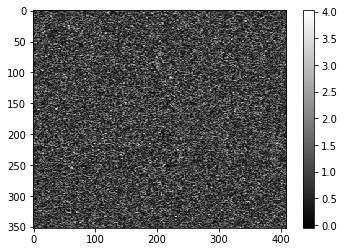

2 ==================================
2017-09-07 17:47:23


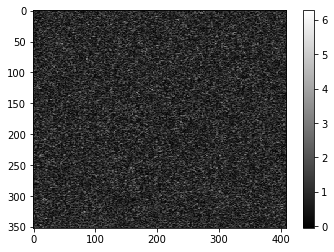

3 ==================================
2017-09-07 17:46:04


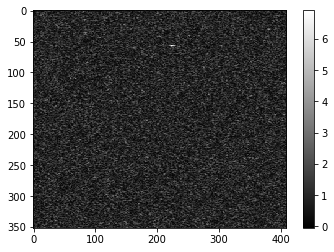

4 ==================================
2017-09-07 17:46:03


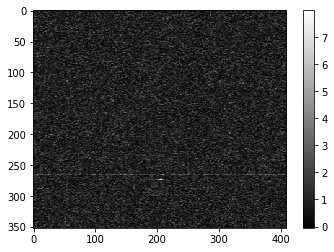

5 ==================================
2017-09-07 17:44:41


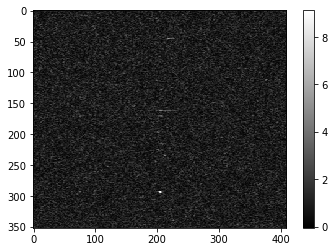

6 ==================================
2017-09-07 17:43:30


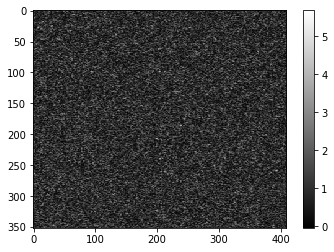

7 ==================================
2017-09-07 17:42:12


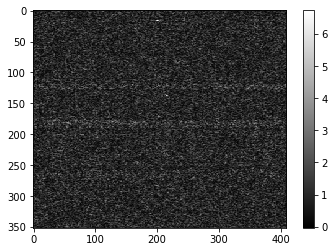

8 ==================================
2017-09-07 17:42:11


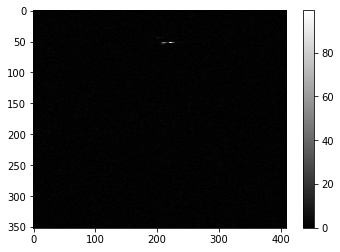

9 ==================================
2017-09-07 17:40:58


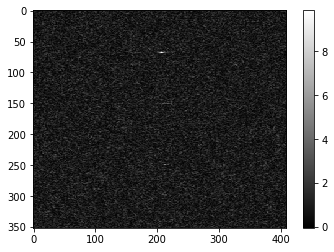

10 ==================================
2017-09-07 17:39:33


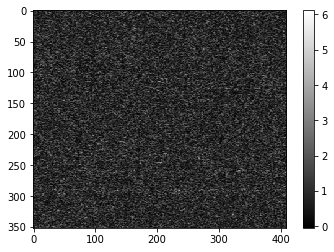

In [14]:

for i, snap in enumerate(snapshots[:10]):
    image_file = download_file(snap['url_file'], cache=True)
    image_data = fits.getdata(image_file, ext=1)
    plt.figure()
    plt.imshow(image_data, cmap='gray')
    plt.colorbar()
    print(i+1, '==================================')
    print(snap['obstime'])
    plt.show()